In [1]:
### Getting and setting up Indicators ###
### Import dependencies ###
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np
import talib as ta

plt.style.use('bmh')
# Ignore warings
import warnings
warnings.filterwarnings("ignore")

In [2]:
### Get Data Frames from Yahoo! Finance ###
# yfinance is used to fetch data 
yf.pdr_override()
# Input
symbol = 'FB'
start = '2017-01-01'
end = '2020-07-31'
# Read data 
df = yf.download(symbol,start,end)

[*********************100%***********************]  1 of 1 completed


In [3]:
### Using dataFrames ###
# View Columns
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,116.029999,117.839996,115.510002,116.860001,116.860001,20663900
2017-01-04,117.550003,119.660004,117.290001,118.690002,118.690002,19630900
2017-01-05,118.860001,120.949997,118.320000,120.669998,120.669998,19492200
2017-01-06,120.980003,123.879997,120.029999,123.410004,123.410004,28545300
2017-01-09,123.550003,125.430000,123.040001,124.900002,124.900002,22880400


In [4]:
### Simple Moving Average (SMA) ###
def SMA(data, ndays): 
    SMA = pd.Series(
        data['Adj Close'].rolling(ndays).mean(), 
        name = 'SMA') # Calculate SMA
    data = data.join(SMA) # Add SMA from dafaFrame
    data = data.dropna() # Clear missing values
    return data

n = 100  # Periods
sma_df = df.copy()
sma_df = SMA(sma_df,n)
sma1 = sma_df['SMA']
# Show dafaframe
sma1

Date
2017-05-25    138.510400
2017-05-26    138.863100
2017-05-30    139.200000
2017-05-31    139.507900
2017-06-01    139.789100
                 ...    
2020-07-24    204.947701
2020-07-27    205.365101
2020-07-28    205.814601
2020-07-29    206.336600
2020-07-30    206.986600
Name: SMA, Length: 801, dtype: float64

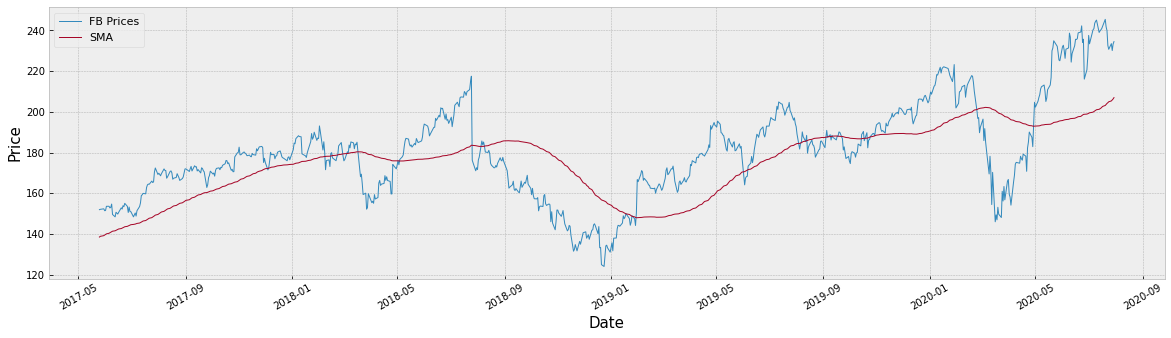

In [5]:
### Plot Simple Moving Average (SMA) ###
# Some styling
plt.figure(figsize=(20,5))
# Plot data
plt.plot(sma_df['Adj Close'],lw=1, label='FB Prices')
plt.plot(sma1,lw=1, label='SMA')
# Some styling
plt.ylabel('Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
# Show Chart
plt.show()

In [6]:
### Exponential Moving Average (EMA) ###
def EMA(data, period): 
    EMA = pd.Series(ta.EMA(data['Adj Close'], timeperiod = period), 
                 name = 'EMA_' + str(period)) 
    data = data.join(EMA) 
    # Clear NaN data
    data = data.dropna()
    return data

periods = 100
symbol_df = df.copy()
symbol_df= EMA(symbol_df,periods)
# Show dafaframe
symbol_df

,Open,High,Low,Close,Adj Close,Volume,EMA_100
Date,,,,,,,
2017-05-25,150.300003,152.589996,149.949997,151.960007,151.960007,19891400,138.510400
2017-05-26,152.229996,152.250000,151.149994,152.130005,152.130005,14996200,138.780095
2017-05-30,151.970001,152.899994,151.639999,152.380005,152.380005,13226000,139.049400
2017-05-31,152.699997,153.350006,151.089996,151.460007,151.460007,18023900,139.295155
2017-06-01,151.750000,152.289993,150.300003,151.529999,151.529999,14530600,139.537429
...,...,...,...,...,...,...,...
2020-07-24,230.190002,233.490005,226.899994,230.710007,230.710007,18314700,217.777514
2020-07-27,231.460007,234.949997,230.830002,233.500000,233.500000,13163100,218.088851
2020-07-28,234.630005,234.960007,229.830002,230.119995,230.119995,14170100,218.327091


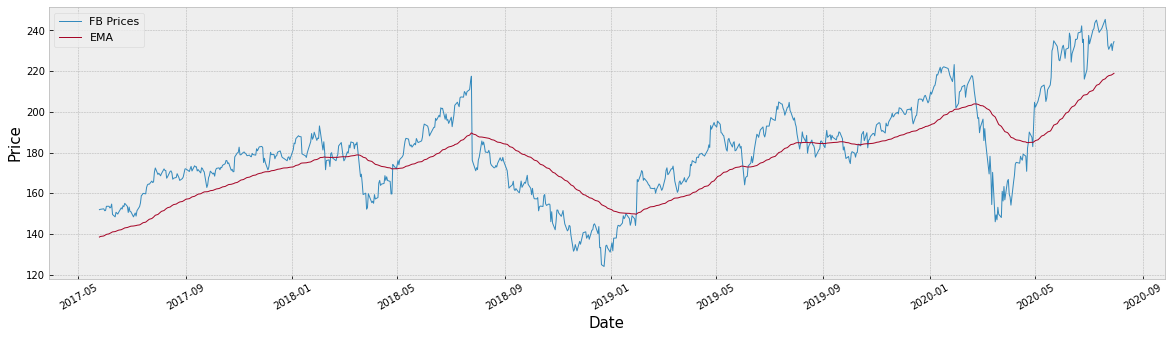

In [7]:
### Plot Exponential Moving Average (EMA) ###
# Some styling
plt.figure(figsize=(20,5))
# Plot data
plt.plot(symbol_df['Adj Close'],lw=1, label='FB Prices')
plt.plot(symbol_df['EMA_'+ str(periods)],lw=1, label='EMA')
# Some styling
plt.ylabel('Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
# Show Chart
plt.show()

In [8]:
### Exponentially-weighted Moving Average (EWMA o WMA) ###
def EWMA(data, ndays): 
    EWMA = pd.Series(data['Adj Close'].ewm(span = ndays, min_periods = ndays - 1).mean(), 
                 name = 'EWMA_' + str(ndays)) 
    data = data.join(EWMA) 
    data = data.dropna() # Clear NaN data
    return data

periods = 100 #Periods
symbol_df = df.copy()
symbol_df = EWMA(symbol_df,n)
# Show dafaframe
symbol_df

,Open,High,Low,Close,Adj Close,Volume,EWMA_100
Date,,,,,,,
2017-05-24,148.509995,150.229996,148.419998,150.039993,150.039993,17862400,142.479817
2017-05-25,150.300003,152.589996,149.949997,151.960007,151.960007,19891400,142.696924
2017-05-26,152.229996,152.250000,151.149994,152.130005,152.130005,14996200,142.912284
2017-05-30,151.970001,152.899994,151.639999,152.380005,152.380005,13226000,143.127783
2017-05-31,152.699997,153.350006,151.089996,151.460007,151.460007,18023900,143.316877
...,...,...,...,...,...,...,...
2020-07-24,230.190002,233.490005,226.899994,230.710007,230.710007,18314700,217.777516
2020-07-27,231.460007,234.949997,230.830002,233.500000,233.500000,13163100,218.088852
2020-07-28,234.630005,234.960007,229.830002,230.119995,230.119995,14170100,218.327093


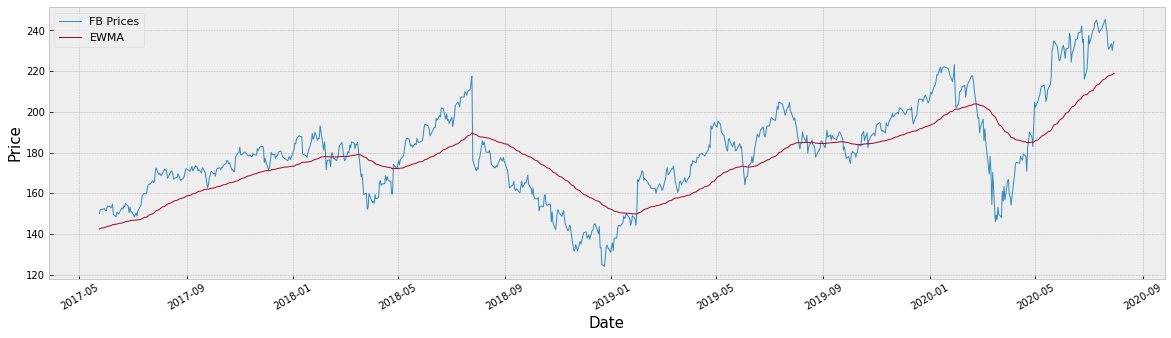

In [9]:
### Plot Exponentially-weighted Moving Average (EWMA or WMA) ###
# Some styling
plt.figure(figsize=(20,5))
# Plot data
plt.plot(symbol_df['Adj Close'],lw=1, label='FB Prices')
plt.plot(symbol_df['EWMA_'+ str(periods)],lw=1, label='EWMA')
# Some styling
plt.ylabel('Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
# Show Chart
plt.show()

In [10]:
### Relative Strength Index (RSI) ###
def RSI(data, period):
    RSI = pd.Series(
        ta.RSI(data['Adj Close'],period), 
        name = 'RSI')
    data = data.join(RSI)
    data = data.dropna()  # Clear NaN data
    return data

# Calculate el RSI 
period = 14
symbol_df = df.copy()
symbol_df = RSI(symbol_df, period)

symbol_df

,Open,High,Low,Close,Adj Close,Volume,RSI
Date,,,,,,,
2017-01-24,129.380005,129.899994,128.380005,129.369995,129.369995,15162700,88.350730
2017-01-25,130.000000,131.740005,129.770004,131.479996,131.479996,18731300,89.775244
2017-01-26,131.630005,133.139999,131.440002,132.779999,132.779999,20020100,90.542583
2017-01-27,132.679993,132.949997,131.080002,132.179993,132.179993,19539500,87.286632
2017-01-30,131.580002,131.580002,129.600006,130.979996,130.979996,18956100,81.012065
...,...,...,...,...,...,...,...
2020-07-24,230.190002,233.490005,226.899994,230.710007,230.710007,18314700,44.138884
2020-07-27,231.460007,234.949997,230.830002,233.500000,233.500000,13163100,47.381471
2020-07-28,234.630005,234.960007,229.830002,230.119995,230.119995,14170100,44.045784


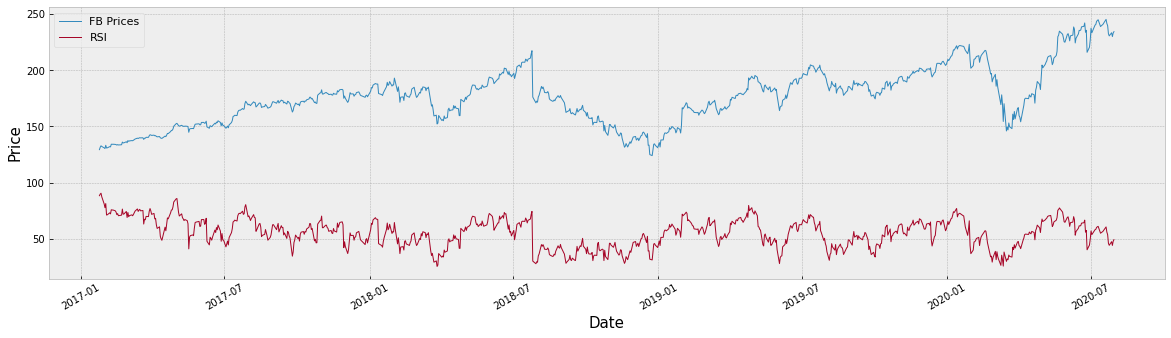

In [11]:
### Plot Relative Strength Index (RSI) ###
# Some styling
plt.figure(figsize=(20,5))
# Plot data
plt.plot(symbol_df['Adj Close'],lw=1, label='FB Prices')
plt.plot(symbol_df['RSI'],lw=1, label='RSI')
# Some styling
plt.ylabel('Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
# Show Chart
plt.show()

In [12]:
### Bollinger Bands (BBAND) ###
def BBANDS(data, ndays):
    MA = data.Close.rolling(ndays).mean()
    SD = data.Close.rolling(ndays).std()
    data['UpperBB'] = MA + (2 * SD) 
    data['LowerBB'] = MA - (2 * SD)
    return data

n = 100  # Periods
bbands_df = df.copy()
bbands_df = BBANDS(bbands_df, n)
# Show dafaframe
bbands_df

,Open,High,Low,Close,Adj Close,Volume,UpperBB,LowerBB
Date,,,,,,,,
2017-01-03,116.029999,117.839996,115.510002,116.860001,116.860001,20663900,NaN,NaN
2017-01-04,117.550003,119.660004,117.290001,118.690002,118.690002,19630900,NaN,NaN
2017-01-05,118.860001,120.949997,118.320000,120.669998,120.669998,19492200,NaN,NaN
2017-01-06,120.980003,123.879997,120.029999,123.410004,123.410004,28545300,NaN,NaN
2017-01-09,123.550003,125.430000,123.040001,124.900002,124.900002,22880400,NaN,NaN
...,...,...,...,...,...,...,...,...
2020-07-24,230.190002,233.490005,226.899994,230.710007,230.710007,18314700,268.650162,141.245239
2020-07-27,231.460007,234.949997,230.830002,233.500000,233.500000,13163100,269.265113,141.465088
2020-07-28,234.630005,234.960007,229.830002,230.119995,230.119995,14170100,269.772997,141.856204


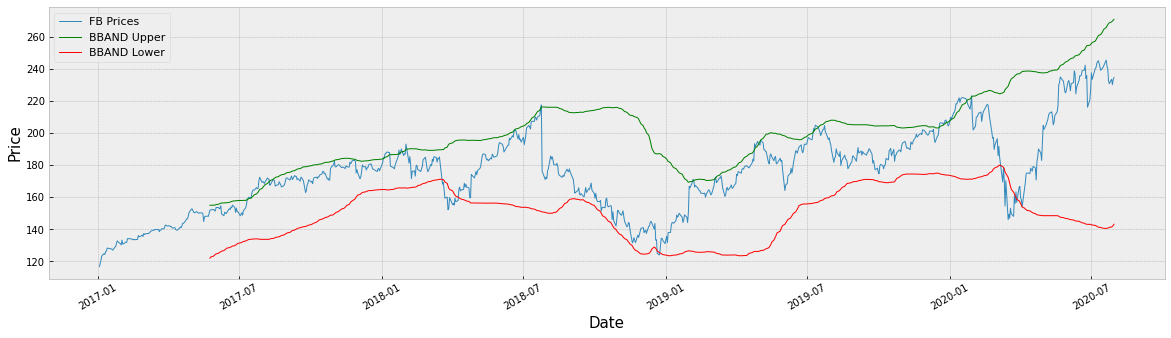

In [13]:
### Plot Bollinger Bands (BBAND) ###
# Some styling
plt.figure(figsize=(20,5))
# Plot data
plt.plot(bbands_df['Adj Close'],lw=1, label='FB Prices')
plt.plot(bbands_df['UpperBB'],'g',lw=1,label='BBAND Upper')
plt.plot(bbands_df['LowerBB'],'r',lw=1, label='BBAND Lower')
# Some styling
plt.ylabel('Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
# Show Chart
plt.show()

In [14]:
### Commodity Channel Index (CCI) ###
def CCI(data, ndays): 
    TP = (data['High'] + data['Low'] + data['Adj Close']) / 3 
    CCI = pd.Series((TP - TP.rolling(ndays).mean()) / (0.015 * TP.rolling(ndays).std()),
                    name = 'CCI') 
    data = data.join(CCI) 
    return data

cci_df = df.copy()
n = 14  # Periods
cci_df = CCI(cci_df,n)
# Show dafaframe
cci_df

,Open,High,Low,Close,Adj Close,Volume,CCI
Date,,,,,,,
2017-01-03,116.029999,117.839996,115.510002,116.860001,116.860001,20663900,NaN
2017-01-04,117.550003,119.660004,117.290001,118.690002,118.690002,19630900,NaN
2017-01-05,118.860001,120.949997,118.320000,120.669998,120.669998,19492200,NaN
2017-01-06,120.980003,123.879997,120.029999,123.410004,123.410004,28545300,NaN
2017-01-09,123.550003,125.430000,123.040001,124.900002,124.900002,22880400,NaN
...,...,...,...,...,...,...,...
2020-07-24,230.190002,233.490005,226.899994,230.710007,230.710007,18314700,-180.970990
2020-07-27,231.460007,234.949997,230.830002,233.500000,233.500000,13163100,-107.258188
2020-07-28,234.630005,234.960007,229.830002,230.119995,230.119995,14170100,-107.057668


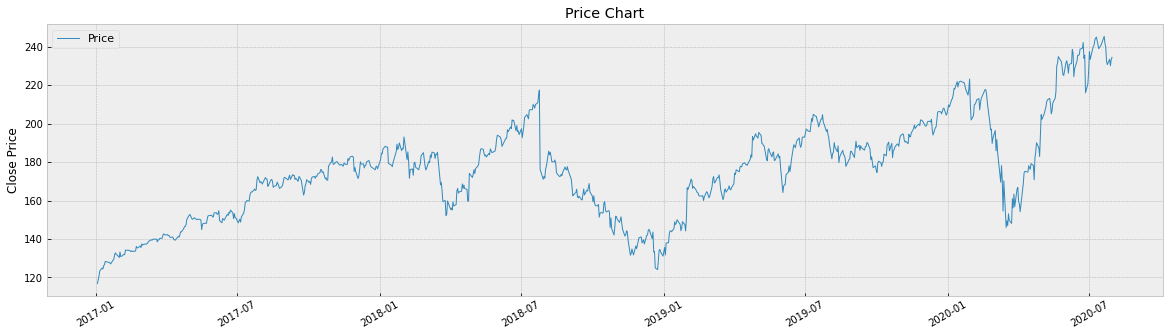

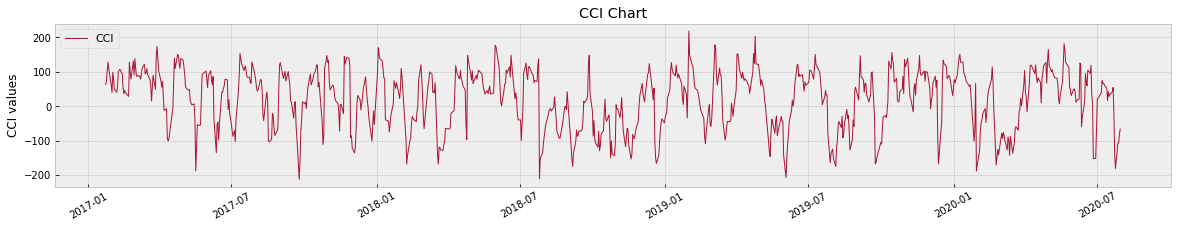

In [16]:
### Plot Commodity Channel Index (CCI) ###
# Some styling
plt.figure(figsize=(20,5))
# Plot data
plt.plot(cci_df['Adj Close'],lw=1,label='Price')
# Some styling
plt.legend(loc=2,prop={'size':11})
plt.title('Price Chart')
plt.ylabel('Close Price')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
## == CCI Plot == 
# Some styling
plt.figure(figsize=(20,3))
# Plot data
plt.plot(cci_df['CCI'],'#aa1736',lw=1,label='CCI')
# Some styling
plt.title('CCI Chart')
plt.legend(loc=2,prop={'size':11})
plt.ylabel('CCI values')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
# Show Chart
plt.show()

In [17]:
### Ease of Movement (EVM) ###
def EVM(data, ndays): 
    dm = ((data['High'] + data['Low'])/2) - ((data['High'].shift(1) + data['Low'].shift(1))/2)
    br = (data['Volume'] / 100000000) / ((data['High'] - data['Low']))
    EVM = dm / br 
    EVM_MA = pd.Series(EVM.rolling(ndays).mean(), name = 'EVM') 
    data = data.join(EVM_MA) 
    data = data.dropna() # Clear NaN data
    return data 

n = 14 # Periods
evm_df = df.copy()
evm_df = EVM(evm_df, n)
# Show dafaframe
evm_df

,Open,High,Low,Close,Adj Close,Volume,EVM
Date,,,,,,,
2017-01-24,129.380005,129.899994,128.380005,129.369995,129.369995,15162700,9.765882
2017-01-25,130.000000,131.740005,129.770004,131.479996,131.479996,18731300,9.426894
2017-01-26,131.630005,133.139999,131.440002,132.779999,132.779999,20020100,9.239967
2017-01-27,132.679993,132.949997,131.080002,132.179993,132.179993,19539500,6.816935
2017-01-30,131.580002,131.580002,129.600006,130.979996,130.979996,18956100,4.052624
...,...,...,...,...,...,...,...
2020-07-24,230.190002,233.490005,226.899994,230.710007,230.710007,18314700,-15.248300
2020-07-27,231.460007,234.949997,230.830002,233.500000,233.500000,13163100,-24.828245
2020-07-28,234.630005,234.960007,229.830002,230.119995,230.119995,14170100,-22.505105


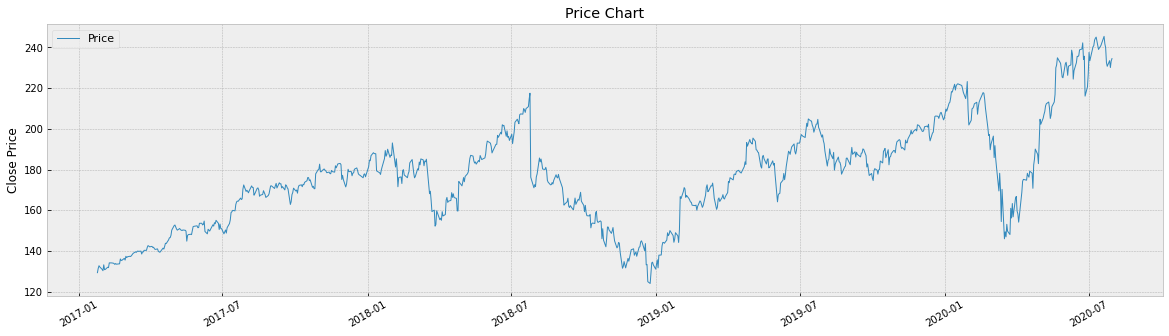

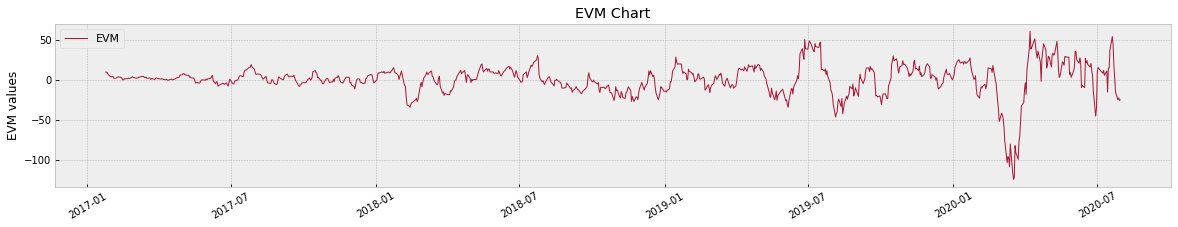

In [18]:
### Plot Ease of Movement (EVM) ###
# Some styling
plt.figure(figsize=(20,5))
# Plot data
plt.plot(evm_df['Adj Close'],lw=1,label='Price')
# Some styling
plt.legend(loc=2,prop={'size':11})
plt.title('Price Chart')
plt.ylabel('Close Price')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
## == EVM Plot == 
# Some styling
plt.figure(figsize=(20,3))
# Plot data
plt.plot(evm_df['EVM'],'#aa1736',lw=1,label='EVM')
# Some styling
plt.legend(loc=2,prop={'size':11})
plt.title('EVM Chart')
plt.ylabel('EVM values')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
# Show Chart
plt.show()

In [19]:
### Rate of Change (ROC) ###
def ROC(data,n):
    N = data['Adj Close'].diff(n)
    D = data['Adj Close'].shift(n)
    ROC = pd.Series(N/D,name='Rate of Change')
    data = data.join(ROC)
    data = data.dropna()
    return data 
 
n = 30 # Periods
roc_df = df.copy()
roc_df = ROC(roc_df,n)
roc = roc_df['Rate of Change']
# Show dafaframe
roc_df

,Open,High,Low,Close,Adj Close,Volume,Rate of Change
Date,,,,,,,
2017-02-15,133.449997,133.699997,132.660004,133.440002,133.440002,13226500,0.141879
2017-02-16,133.070007,133.869995,133.020004,133.839996,133.839996,12831100,0.127643
2017-02-17,133.500000,134.089996,133.169998,133.529999,133.529999,12276500,0.106572
2017-02-21,133.500000,133.910004,132.899994,133.720001,133.720001,14759100,0.083543
2017-02-22,133.600006,136.789993,133.460007,136.119995,136.119995,27360100,0.089832
...,...,...,...,...,...,...,...
2020-07-24,230.190002,233.490005,226.899994,230.710007,230.710007,18314700,0.027982
2020-07-27,231.460007,234.949997,230.830002,233.500000,233.500000,13163100,0.021524
2020-07-28,234.630005,234.960007,229.830002,230.119995,230.119995,14170100,-0.010237


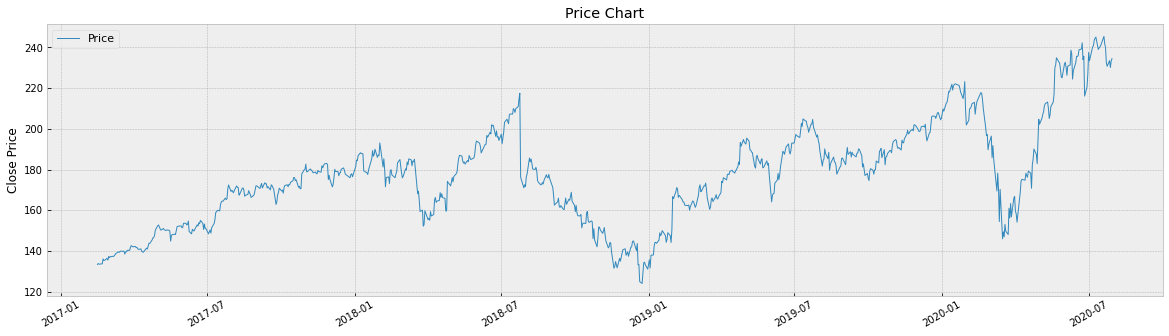

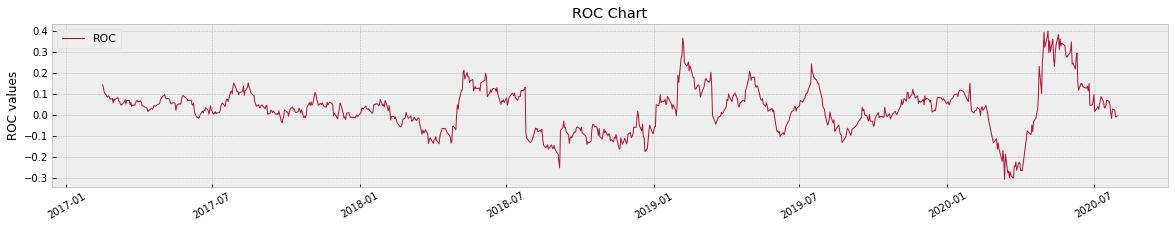

In [20]:
### Plot Rate of Change (ROC) ###
# Some styling
plt.figure(figsize=(20,5))
# Plot data
plt.plot(roc_df['Adj Close'],lw=1,label='Price')
# Some styling
plt.legend(loc=2,prop={'size':11})
plt.title('Price Chart')
plt.ylabel('Close Price')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
## == ROC Plot == 
# Some styling
plt.figure(figsize=(20,3))
# Plot data
plt.plot(roc,'#aa1736',lw=1,label='ROC')
# Some styling
plt.legend(loc=2,prop={'size':11})
plt.title('ROC Chart')
plt.ylabel('ROC values')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
# Show Chart
plt.show()

In [21]:
### Stochastic oscillator (STOCH) ###
def STOCH(data):
    data['slowk'], data['slowd'] = ta.STOCH(
        data['High'], data['Low'], data['Adj Close'], 
        fastk_period=14, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
    data = data.dropna()
    return data

stoch_df = df.copy()
stoch_df = STOCH(stoch_df.tail(100))
# Show dataFrame
stoch_df

,Open,High,Low,Close,Adj Close,Volume,slowk,slowd
Date,,,,,,,,
2020-04-02,159.100006,161.350006,155.919998,158.190002,158.190002,20886300,72.214033,72.813982
2020-04-03,157.149994,157.910004,150.830002,154.179993,154.179993,25983300,59.779295,69.408328
2020-04-06,160.149994,166.199997,158.509995,165.550003,165.550003,28453600,65.641941,65.878423
2020-04-07,171.789993,173.389999,166.009995,168.830002,168.830002,31411900,73.313718,66.244985
2020-04-08,171.250000,175.000000,167.740005,174.279999,174.279999,21664200,89.084988,76.013549
...,...,...,...,...,...,...,...,...
2020-07-24,230.190002,233.490005,226.899994,230.710007,230.710007,18314700,21.424617,40.680884
2020-07-27,231.460007,234.949997,230.830002,233.500000,233.500000,13163100,16.464625,24.929984
2020-07-28,234.630005,234.960007,229.830002,230.119995,230.119995,14170100,19.541248,19.143497


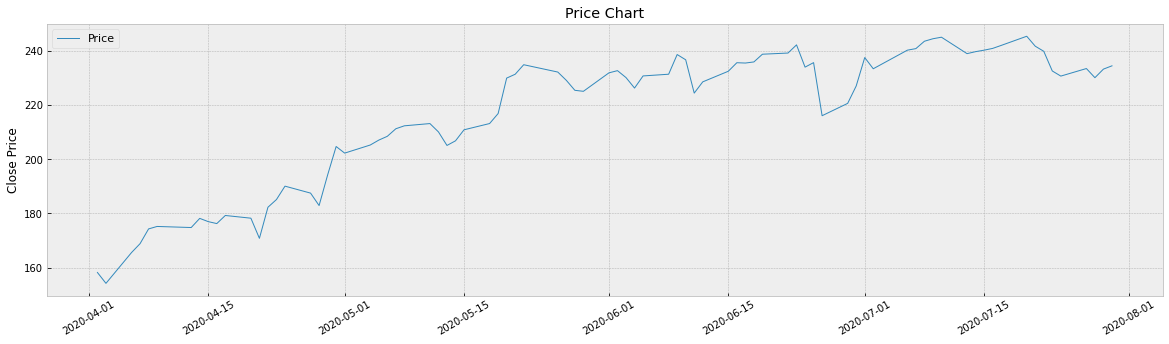

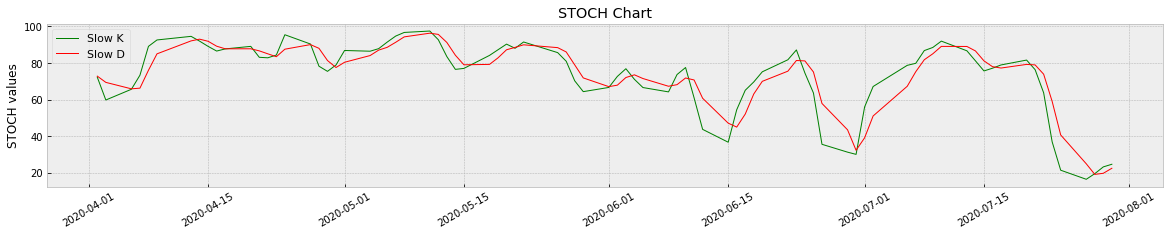

In [22]:
### Plot Stochastic oscillator (STOCH) ###
# Some styling
plt.figure(figsize=(20,5))
# Plot data
plt.plot(stoch_df['Adj Close'],lw=1,label='Price')
# Some styling
plt.legend(loc=2,prop={'size':11})
plt.title('Price Chart')
plt.ylabel('Close Price')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
## == STOCH Plot == 
# Some styling
plt.figure(figsize=(20,3))
# Plot data
plt.plot(stoch_df['slowk'],'g',lw=1,label='Slow K')
plt.plot(stoch_df['slowd'],'r',lw=1,label='Slow D')
# Some styling
plt.legend(loc=2,prop={'size':11})
plt.title('STOCH Chart')
plt.ylabel('STOCH values')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
# Show Chart
plt.show()

In [23]:
### Stochastic Fast (STOCHF) ###
def STOCHF(data):
    data['fastk'], data['fastd'] = ta.STOCHF(
    data['High'], data['Low'], data['Adj Close'], 
    fastk_period=14, fastd_period=3, fastd_matype=0)
    data = data.dropna()
    return data

stochf_df = df.copy()
stochf_df = STOCHF(stochf_df.tail(100))
# Show dafaframe
stochf_df

,Open,High,Low,Close,Adj Close,Volume,fastk,fastd
Date,,,,,,,,
2020-03-31,165.479996,170.929993,164.199997,166.800003,166.800003,23676300,87.791927,69.996257
2020-04-01,161.619995,164.149994,158.039993,159.600006,159.600006,19507600,66.509042,76.231655
2020-04-02,159.100006,161.350006,155.919998,158.190002,158.190002,20886300,62.341131,72.214033
2020-04-03,157.149994,157.910004,150.830002,154.179993,154.179993,25983300,50.487713,59.779295
2020-04-06,160.149994,166.199997,158.509995,165.550003,165.550003,28453600,84.096980,65.641941
...,...,...,...,...,...,...,...,...
2020-07-24,230.190002,233.490005,226.899994,230.710007,230.710007,18314700,16.387152,21.424617
2020-07-27,231.460007,234.949997,230.830002,233.500000,233.500000,13163100,28.387123,16.464625
2020-07-28,234.630005,234.960007,229.830002,230.119995,230.119995,14170100,13.849468,19.541248


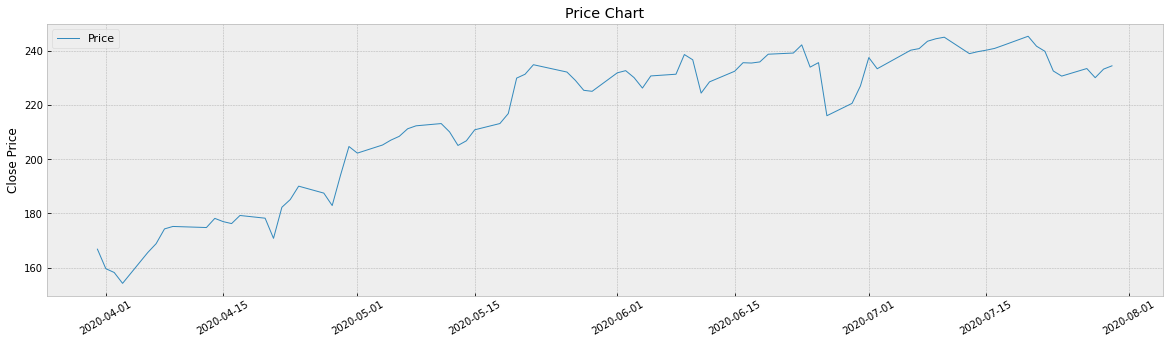

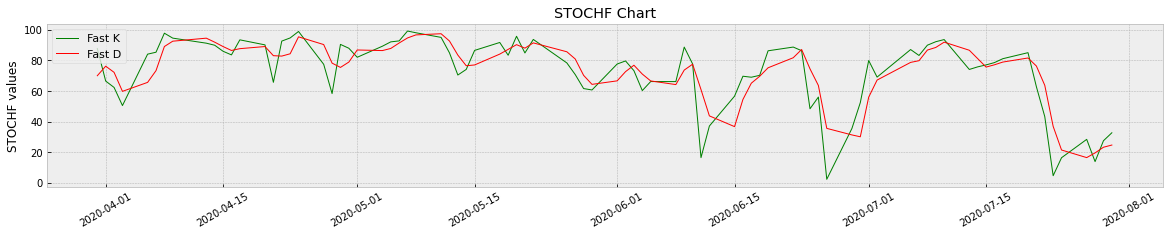

In [24]:
### Plot Stochastic Fast (STOCHF) ###
# Some styling
plt.figure(figsize=(20,5))
# Plot data
plt.plot(stochf_df['Adj Close'],lw=1,label='Price')
# Some styling
plt.legend(loc=2,prop={'size':11})
plt.title('Price Chart')
plt.ylabel('Close Price')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
## == STOCHF Plot == 
# Some styling
plt.figure(figsize=(20,3))
# Plot data
plt.plot(stochf_df['fastk'],'g',lw=1,label='Fast K')
plt.plot(stochf_df['fastd'],'r',lw=1,label='Fast D')
# Some styling
plt.legend(loc=2,prop={'size':11})
plt.title('STOCHF Chart')
plt.ylabel('STOCHF values')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
# Show Chart
plt.show()

In [37]:
### Force Index ###
def ForceIndex(data, periods): 
    FI = pd.Series(df['Adj Close'].diff(periods) * data['Volume'], name = 'ForceIndex') 
    data = data.join(FI) 
    data = data.dropna()
    return data

n = 14
force_index_df = df.copy()
force_index_df = ForceIndex(force_index_df,n)
# Show dafaframe
force_index_df.tail(100)

,Open,High,Low,Close,Adj Close,Volume,ForceIndex
Date,,,,,,,
2020-03-10,174.669998,178.289993,169.500000,178.190002,178.190002,24517800,-9.635496e+08
2020-03-11,174.009995,175.880005,167.660004,170.240005,170.240005,20373900,-9.033787e+08
2020-03-12,159.539993,166.600006,154.339996,154.470001,154.470001,43266300,-2.410365e+09
2020-03-13,163.529999,170.789993,157.600006,170.279999,170.279999,35028600,-1.066271e+09
2020-03-16,152.320007,159.130005,143.100006,146.009995,146.009995,39120400,-1.985752e+09
...,...,...,...,...,...,...,...
2020-07-24,230.190002,233.490005,226.899994,230.710007,230.710007,18325800,-1.753778e+08
2020-07-27,231.460007,234.949997,230.830002,233.500000,233.500000,13163100,-9.688042e+07
2020-07-28,234.630005,234.960007,229.830002,230.119995,230.119995,14170100,-1.907296e+08


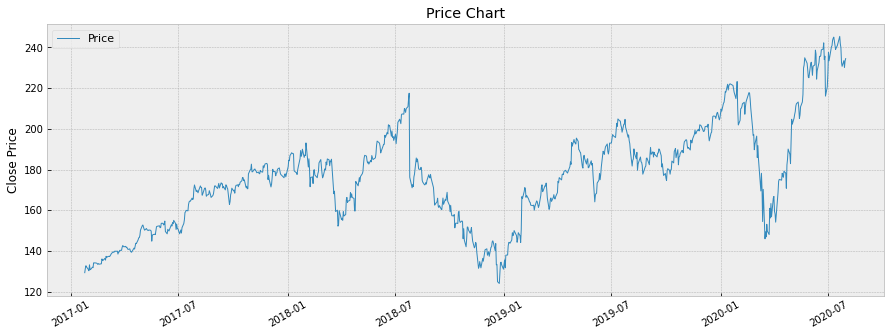

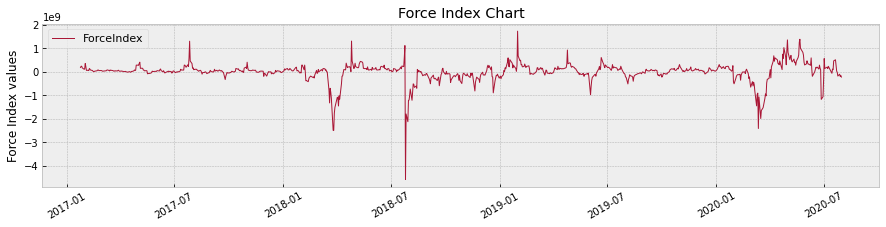

In [38]:
### Plot Force Index ###
# Some styling
plt.figure(figsize=(20,5))
# Plot data
plt.plot(force_index_df['Adj Close'],lw=1,label='Price')
# Some styling
plt.legend(loc=2,prop={'size':11})
plt.title('Price Chart')
plt.ylabel('Close Price')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
## == Force Index Plot == 
# Some styling
plt.figure(figsize=(20,3))
# Plot data
plt.plot(force_index_df['ForceIndex'],'#aa1736',lw=1,label='ForceIndex')
# Some styling
plt.legend(loc=2,prop={'size':11})
plt.title('Force Index Chart')
plt.ylabel('Force Index values')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
# Show Chart
plt.show()

In [25]:
### Calculate Volatility ###
def Volatitlity(data,period):
    # Calculate the logarithmic returns using the Adj Closing price 
    data['Log_Ret'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
    # Calculate Volatility using the pandas rolling standard deviation function
    data['Volatility'] = data['Log_Ret'].rolling(period).std() * np.sqrt(period)
    return data

vol_df = df.copy()
n=100 # Volatility for 100 periods
vol_df = Volatitlity(vol_df, n)
# Show dafaframe
vol_df.tail(15)

,Open,High,Low,Close,Adj Close,Volume,Log_Ret,Volatility
Date,,,,,,,,
2020-07-10,243.690002,245.490005,239.320007,245.070007,245.070007,22982700,0.002329,0.363815
2020-07-13,247.009995,250.149994,238.419998,239.000000,239.000000,24674900,-0.025080,0.364754
2020-07-14,236.759995,240.330002,232.029999,239.729996,239.729996,23378100,0.003050,0.364468
2020-07-15,241.550003,244.820007,238.050003,240.279999,240.279999,19133600,0.002292,0.363802
2020-07-16,238.000000,241.759995,236.330002,240.929993,240.929993,18880700,0.002701,0.360640
2020-07-17,241.000000,244.160004,237.860001,242.029999,242.029999,18152400,0.004555,0.359982
2020-07-20,240.059998,246.050003,235.639999,245.419998,245.419998,20872200,0.013909,0.360177
2020-07-21,246.220001,246.910004,240.080002,241.750000,241.750000,19409700,-0.015067,0.358259
2020-07-22,240.259995,241.899994,238.119995,239.869995,239.869995,15427900,-0.007807,0.358203


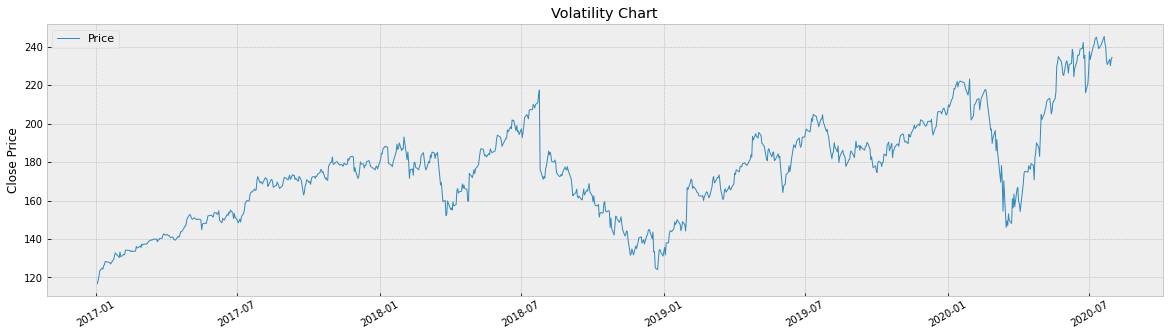

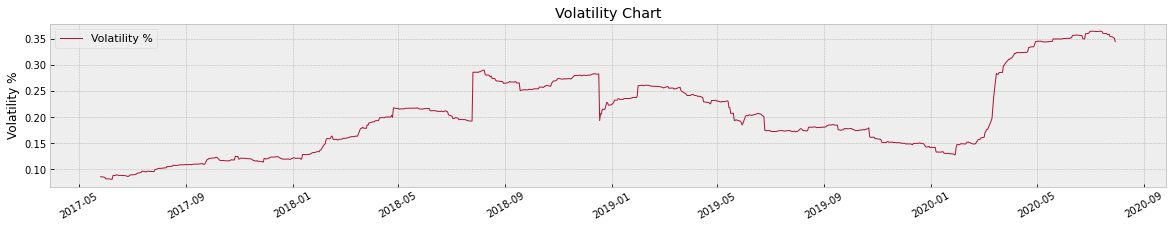

In [26]:
### Plot Volatility ###
# Some styling
plt.figure(figsize=(20,5))
# Plot data
plt.plot(vol_df['Adj Close'],lw=1,label='Price')
# Some styling
plt.legend(loc=2,prop={'size':11})
plt.title('Volatility Chart')
plt.ylabel('Close Price')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
## == Volatility Plot == 
# Some styling
plt.figure(figsize=(20,3))
# Plot data
plt.plot(vol_df['Volatility'],'#aa1736',lw=1,label='Volatility %')
# Some styling
plt.legend(loc=2,prop={'size':11})
plt.title('Volatility Chart')
plt.ylabel('Volatility %')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
# Show Chart
plt.show()

In [27]:
### Sharpe Ratio ###
# Deternime Volatility
def Volatitlity(data,period):
    # Calculate the logarithmic returns using the Adj Closing price 
    data['Log_Ret'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
    # Calculate Volatility using the pandas rolling standard deviation function
    data['Volatility'] = data['Log_Ret'].rolling(period).std() * np.sqrt(period)
    return data

vol_df = df.copy()
n=252 # Volatility active matket days
vol_df = Volatitlity(vol_df, n)
print(vol_df.tail(15))

# Sharpe Ratio
def sharpe_ratio(returns, rf, days=252):
    volatility = returns.std() * np.sqrt(days)
    sharpe_ratio = (returns.mean() - rf) / volatility
    return sharpe_ratio

sarpeRatio = sharpe_ratio(vol_df['Log_Ret'], vol_df['Volatility'])
# Show dafaframe
sarpeRatio

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-07-10  243.690002  245.490005  239.320007  245.070007  245.070007   
2020-07-13  247.009995  250.149994  238.419998  239.000000  239.000000   
2020-07-14  236.759995  240.330002  232.029999  239.729996  239.729996   
2020-07-15  241.550003  244.820007  238.050003  240.279999  240.279999   
2020-07-16  238.000000  241.759995  236.330002  240.929993  240.929993   
2020-07-17  241.000000  244.160004  237.860001  242.029999  242.029999   
2020-07-20  240.059998  246.050003  235.639999  245.419998  245.419998   
2020-07-21  246.220001  246.910004  240.080002  241.750000  241.750000   
2020-07-22  240.259995  241.899994  238.119995  239.869995  239.869995   
2020-07-23  239.630005  242.419998  231.750000  232.600006  232.600006   
2020-07-24  230.190002  233.490005  226.899994  230.710007  230.710007   
2020-07-27  231.460007  234.949997  23

Date
2017-01-03         NaN
2017-01-04         NaN
2017-01-05         NaN
2017-01-06         NaN
2017-01-09         NaN
                ...   
2020-07-24   -1.216619
2020-07-27   -1.216989
2020-07-28   -1.216392
2020-07-29   -1.216921
2020-07-30   -1.216166
Name: Volatility, Length: 900, dtype: float64

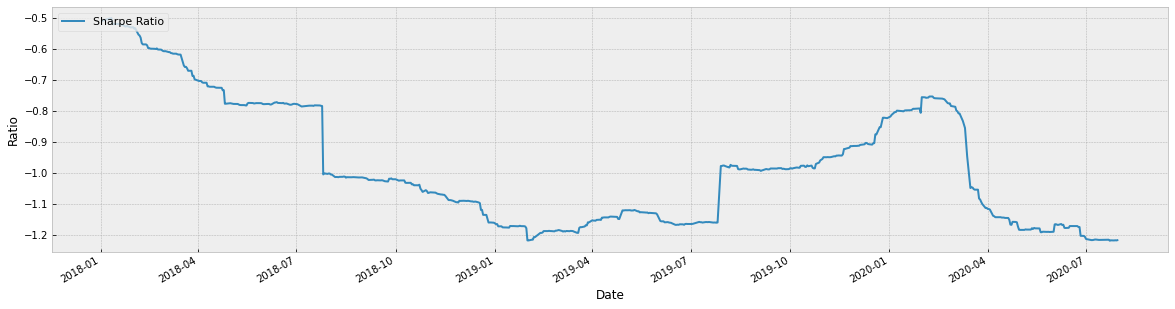

In [28]:
### Plot Sharpe Ratio ###
plt.figure(figsize=(20,5))
sarpeRatio.plot(label='Sharpe Ratio')
# Some styling
plt.legend(loc=2,prop={'size':11})
plt.ylabel('Ratio')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
# Show Chart
plt.show()

In [29]:
# Information ratio (IR)
import numpy as np
def information_ratio(returns, benchmark_returns, days=252):
    return_difference = returns - benchmark_returns
    volatility = return_difference.std() * np.sqrt(days)
    information_ratio = return_difference.mean() / volatility
    return information_ratio

# Call the function
inf = information_ratio(vol_df['Log_Ret'], sarpeRatio)
# Show Information Ratio
inf

0.311476348171992